<a href="https://colab.research.google.com/github/skozh/ADA1/blob/master/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Vector Operations

In [1]:
import numpy as np
import time
from matplotlib import pyplot as plt

In [2]:
# Bubble Sort Algorithm

def bubbleSort(arr): 
    n = len(arr) 

    for i in range(n-1): 
        for j in range(0, n-i-1): 
            if arr[j] > arr[j+1] : 
                arr[j], arr[j+1] = arr[j+1], arr[j] 
    return arr

In [3]:
# Polynomial evaluation direct method

def polyvalDirect(arr, p):
  total = 0
  for index, val in enumerate(arr):
    total += val*(p**index)
  return total

In [4]:
# Generate random vector of size 2000

def generate_rv(arr):
    return np.random.uniform(1, 100, size=(arr))


# Select operation

def fun_operation(v, n):
    if n==0:
        return 5
    elif n==1:
        return np.add.reduce(v)
    elif n==2:
        return np.multiply.reduce(v)
    elif n==3:
        return bubbleSort(v)
    elif n==4:
        return np.sort(v, kind='quicksort')
    elif n==5:
        return np.sort(v, kind='mergesort') # timsort
    elif n==6:
        return np.polyval(v, 1.5)  # Horner's method
    elif n==7:
        return polyvalDirect(v, 1.5)
    else:
        return None

In [5]:
time_averages = np.zeros((5, 8))
time_elapsed = np.zeros((8, 2000))

for run in range(5):
    time_elapsed = np.zeros((8, 2000))

    for n in range(2000):
        v = generate_rv(arr=100)

        for op in range(8):
            start_time = time.time()
            y = fun_operation(v, op)
            time_elapsed[op][n] = (time.time() - start_time)

    time_averages[run] = (np.mean(time_elapsed, axis=1))

In [6]:
from tabulate import tabulate
headers = ['Constant','Sum','Product','Bubble Sort','Quick Sort','Tim Sort','Polyval-Horners', 'Polyval-Direct']
table = tabulate(time_averages, headers, tablefmt='psql')
print(table)

+-------------+-------------+-------------+---------------+--------------+-------------+-------------------+------------------+
|    Constant |         Sum |     Product |   Bubble Sort |   Quick Sort |    Tim Sort |   Polyval-Horners |   Polyval-Direct |
|-------------+-------------+-------------+---------------+--------------+-------------+-------------------+------------------|
| 5.28693e-07 | 5.47791e-06 | 2.58207e-06 |    0.00275435 |  1.00245e-05 | 5.13613e-06 |       6.37509e-05 |      5.76252e-05 |
| 5.28097e-07 | 5.28753e-06 | 2.66504e-06 |    0.00275014 |  9.4254e-06  | 4.37152e-06 |       6.25904e-05 |      5.72217e-05 |
| 5.37038e-07 | 5.28252e-06 | 2.51639e-06 |    0.00274631 |  9.36902e-06 | 4.28104e-06 |       6.25827e-05 |      5.72315e-05 |
| 5.2011e-07  | 5.23674e-06 | 2.60329e-06 |    0.00273987 |  9.34112e-06 | 4.31573e-06 |       6.25079e-05 |      5.70171e-05 |
| 5.26071e-07 | 5.26011e-06 | 2.59852e-06 |    0.00273574 |  9.35793e-06 | 4.32265e-06 |       6.23779e-

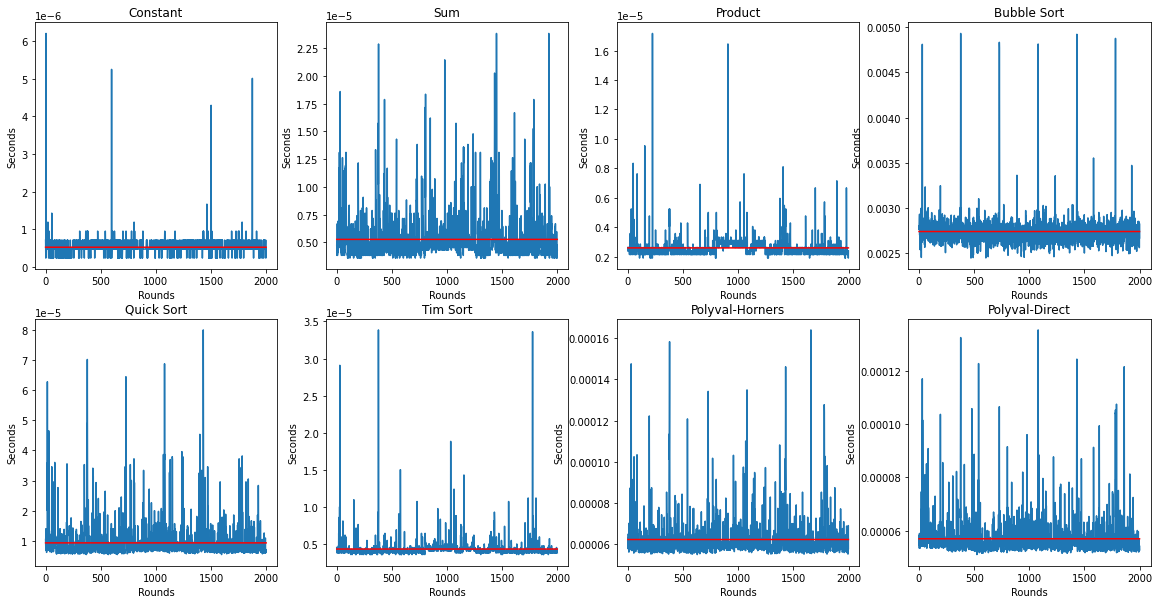

In [16]:
avg = np.mean(time_elapsed, axis=1).reshape(8,1)  * np.ones((1, 2000), dtype='float')
fig = plt.figure(figsize=(20, 10))
for i in range(8):
  plt.subplot(2, 4, i+1).set_title(headers[i])
  plt.plot(time_elapsed[i])
  plt.plot(avg[i], color='red' )
  plt.xlabel("Rounds")
  plt.ylabel("Seconds")

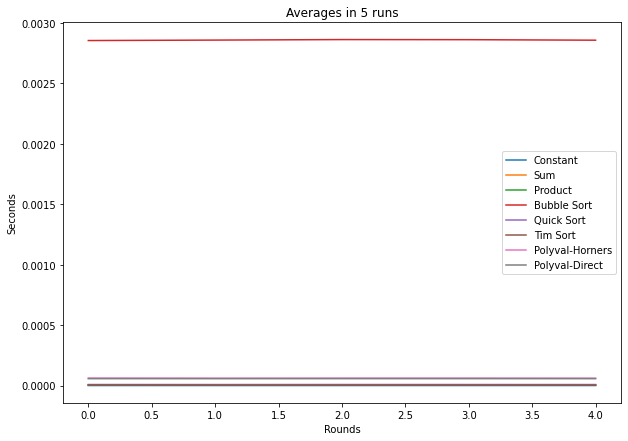

In [ ]:
time_avgs = time_averages.transpose()
fig = plt.figure(figsize=(10, 7))
for i in range(8):
  plt.plot(time_avgs[i], label = headers[i])

plt.xlabel('Rounds')
plt.ylabel('Seconds')
plt.title('Averages in 5 runs')
plt.legend()
plt.show()

## Matrix Operations

In [ ]:
def generate_matrix(arr):
    return np.random.rand(arr, arr)

In [ ]:
mat_time_averages = np.zeros(5)
mat_time_elapsed = np.zeros(2000)

for run in range(5):
    mat_time_elapsed = np.zeros(2000)
    for n in range(2000):
        A = generate_matrix(arr=100)
        B = generate_matrix(arr=100)

        start_time = time.time()
        y = np.matmul(A, B)
        mat_time_elapsed[n] = (time.time() - start_time)
        
    mat_time_averages[run] = np.mean(mat_time_elapsed)

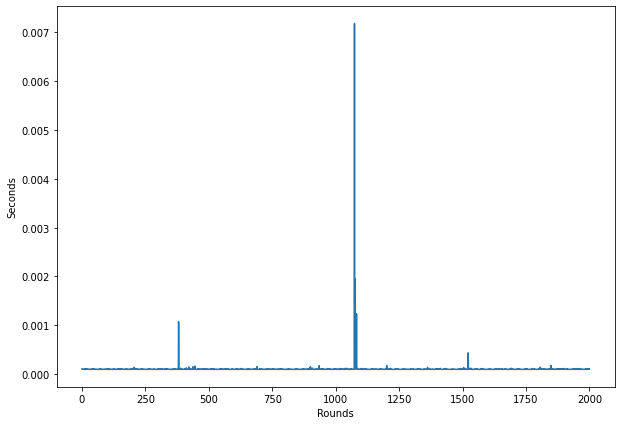

In [ ]:
fig = plt.figure(figsize=(10, 7))
plt.plot(mat_time_elapsed)
plt.xlabel('Rounds')
plt.ylabel('Seconds')
plt.show()

In [ ]:
mat_time_averages

array([0.00011666, 0.00010494, 0.00011114, 0.00010884, 0.00010679])